# Naive Bayes (HOG + PCA Only)
* Why not ResNet for Naive Bayes?
ResNet produces large, dense, continuous-value embeddings →
NB assumes feature independence & Gaussian distribution → performs poorly.
Better to skip NB+ResNet to avoid weird results.


## Import

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score,recall_score,f1_score, classification_report
import seaborn as sns


## Load Features

In [36]:
hog_X = np.load("../data/features/hog_features.npy")
hog_y = np.load("../data/features/hog_labels.npy")

pca_X = np.load("../data/features/pca_features.npy")
pca_y = np.load("../data/features/pca_labels.npy")


## Train / Test Split

In [37]:
def split_data(X, y):
    return train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## Naive Bayes on HOG
* Split
* Train Model
* Prediction + Accuracy
* Confusion Matrix
* ROC + AUC

## Split

In [38]:
X_train, X_test, y_train, y_test = split_data(hog_X, hog_y)


## Train Model

In [39]:
nb = GaussianNB()
nb.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


## Predictions + Accuracy + F1 score + Recall + precision

In [40]:
y_pred_train = nb.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

print("🔹 TRAINING METRICS")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)
print("-" * 60)

🔹 TRAINING METRICS
Accuracy: 0.917087967644085
Precision: 0.817174515235457
Recall: 0.9485530546623794
F1-Score: 0.8779761904761905
------------------------------------------------------------


In [41]:
y_pred_test = nb.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print("🔹 TESTING METRICS")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)
print("-" * 60)

🔹 TESTING METRICS
Accuracy: 0.8891509433962265
Precision: 0.7828947368421053
Recall: 0.8947368421052632
F1-Score: 0.8350877192982457
------------------------------------------------------------


In [42]:
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_test))


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       291
           1       0.78      0.89      0.84       133

    accuracy                           0.89       424
   macro avg       0.87      0.89      0.88       424
weighted avg       0.90      0.89      0.89       424



## Confusion Matrix

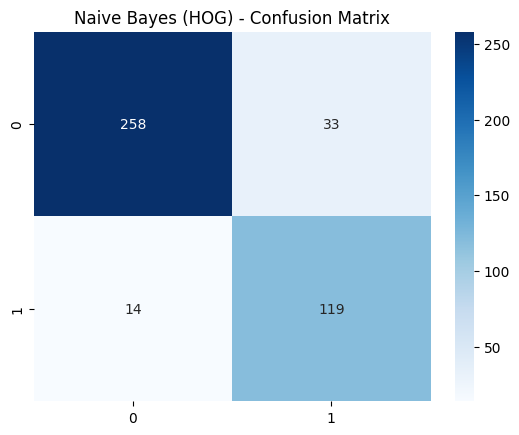

In [43]:
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes (HOG) - Confusion Matrix")
plt.show()


## ROC + AUC

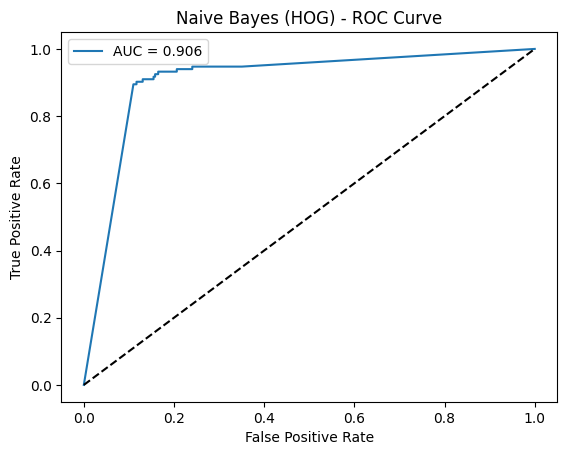

In [44]:
y_prob = nb.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes (HOG) - ROC Curve")
plt.legend()
plt.show()


## Naive Bayes on PCA Features

In [45]:
X_train, X_test, y_train, y_test = split_data(pca_X, pca_y)

nb = GaussianNB()
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


## Predictions + Accuracy + F1 score + Recall + precision

In [46]:
y_pred_train = nb.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

print("🔹 TRAINING METRICS")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)
print("-" * 60)

🔹 TRAINING METRICS
Accuracy: 0.8068756319514662
Precision: 0.6428571428571429
Recall: 0.8681672025723473
F1-Score: 0.7387140902872777
------------------------------------------------------------


In [47]:
y_pred_test = nb.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print("🔹 TESTING METRICS")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)
print("-" * 60)

🔹 TESTING METRICS
Accuracy: 0.7405660377358491
Precision: 0.5621621621621622
Recall: 0.7819548872180451
F1-Score: 0.6540880503144654
------------------------------------------------------------


## Confusion Matrix

In [48]:
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_test))


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       291
           1       0.56      0.78      0.65       133

    accuracy                           0.74       424
   macro avg       0.72      0.75      0.72       424
weighted avg       0.78      0.74      0.75       424



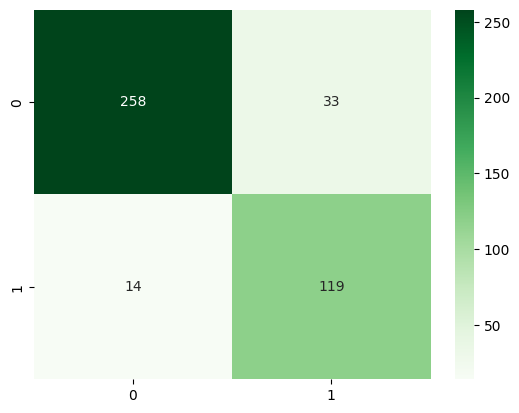

In [49]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.show()

## ROC + AUC

In [50]:
y_prob = nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

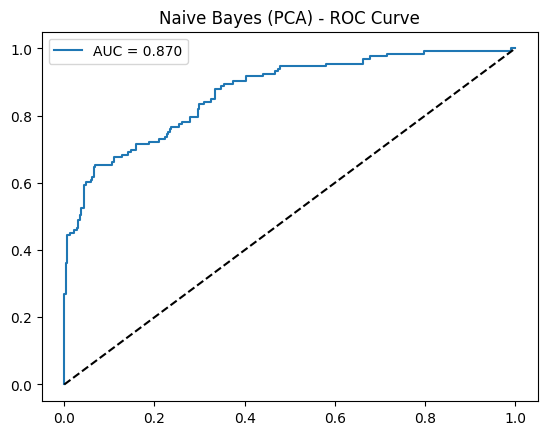

In [51]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.title("Naive Bayes (PCA) - ROC Curve")
plt.legend()
plt.show()